### 목표
- 호준, 지현의 얼굴을 분류하는 이진 분류 신경망 모델을 만들어보자 !

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# PIL : Python Imaging Library(이미지 처리 라이브러리)
from PIL import Image

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정


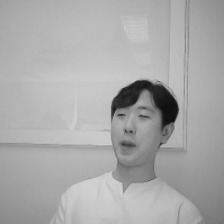

In [3]:
# 이미지를 불러와서 흑백으로 변환
# convert -> L : 흑백, RGB : 컬러
img = Image.open('data/Class 1-samples/0.jpg').convert('L')
img

In [4]:
# 불러온 이미지 데이터를 numpy 배열로 변환
# (기계가 인식할 수 있도록 이미지를 수치 데이터로 변환시키는 과정)
# 가로(행), 세로(열) 픽셀 수로 변경됨
# 학습용 데이터들은 사전에 다 수치데이터로 변환되어져있던 상태

img_array = np.array(img)

In [5]:
img_array.shape

(224, 224)

In [6]:
img_array

array([[159, 159, 160, ..., 139, 139, 138],
       [159, 160, 160, ..., 141, 139, 138],
       [159, 160, 160, ..., 142, 140, 139],
       ...,
       [138, 137, 137, ..., 119, 118, 118],
       [137, 136, 136, ..., 118, 118, 118],
       [136, 135, 135, ..., 118, 118, 119]], dtype=uint8)

### 호준, 지현 각각 200장씩의 데이터를 전부 수치데이터로 변환시켜보자 !

In [7]:
# 반복문 실행시 어느정도 실행되고 있는지를 %로 알려주는 함수
# tqdm : 아랍어로 taqadum 진행이라는 뜻
from tqdm import tqdm

In [8]:
# 데이터셋 구성하기
class1_list = [] # 200장의 호준 데이터
class2_list = [] # 200장의 지현 데이터

for i in tqdm(range(0,200,1)) :
  # 1. 호준 데이터 작업
  # 경로와 파일명에 맞게 이미지를 가져와서 흑백으로 변환 후 img1 변수에 담아주기
  img1 = Image.open('data/Class 1-samples/' + str(i) + '.jpg').convert('L')
  # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
  img_array1 = np.array(img1)
  # 변환된 배열 데이터를 빈 리스트에 하나씩 추가해주기
  class1_list.append(img_array1)

  # 2. 지현 데이터 작업
  img2 = Image.open('data/Class 2-samples/' + str(i) + '.jpg').convert('L')
  img_array2 = np.array(img2)
  class2_list.append(img_array2)

100%|██████████| 200/200 [00:00<00:00, 308.23it/s]


In [9]:
class1_list

[array([[159, 159, 160, ..., 139, 139, 138],
        [159, 160, 160, ..., 141, 139, 138],
        [159, 160, 160, ..., 142, 140, 139],
        ...,
        [138, 137, 137, ..., 119, 118, 118],
        [137, 136, 136, ..., 118, 118, 118],
        [136, 135, 135, ..., 118, 118, 119]], dtype=uint8),
 array([[163, 161, 160, ..., 143, 142, 141],
        [163, 161, 161, ..., 143, 142, 141],
        [163, 162, 161, ..., 143, 142, 141],
        ...,
        [139, 139, 139, ..., 122, 122, 121],
        [138, 138, 139, ..., 121, 121, 121],
        [137, 138, 139, ..., 121, 121, 121]], dtype=uint8),
 array([[161, 161, 161, ..., 144, 143, 142],
        [161, 161, 162, ..., 144, 143, 143],
        [161, 162, 162, ..., 145, 144, 144],
        ...,
        [141, 141, 140, ..., 123, 122, 122],
        [140, 140, 139, ..., 122, 122, 121],
        [139, 138, 138, ..., 122, 121, 121]], dtype=uint8),
 array([[164, 165, 166, ..., 146, 146, 146],
        [164, 165, 166, ..., 146, 146, 146],
        [164, 16

In [10]:
# 리스트를 기계학습에 바로 사용할 수 없기때문에 numpy 배열로 변환시켜주기
# 이미지 하나하나도 배열로, 이를 담고있는 리스트 자체도 배열로 변환시키기!
class1_array = np.array(class1_list)
class2_array = np.array(class2_list)

In [11]:
class1_array.shape, class2_array.shape

((200, 224, 224), (200, 224, 224))

In [12]:
# 두 개의 배열 합치기(문제 데이터 생성)
data = np.concatenate([class1_array, class2_array]) # 좌측부터 순서대로 붙음

In [13]:
data.shape
# 호준 데이터 200개 + 지현 데이터 200개가 순서대로 담겨져있음.

(400, 224, 224)

In [14]:
# 정답 데이터 만들기(문제와 정답의 순서를 일치시켜줘야한다.)
# 0 : 호준 데이터 정답, 1 : 지현 데이터 정답
target = np.array([0]*200 + [1]*200)
target.shape

(400,)

In [15]:
# 학습, 평가 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size = 0.2,
                                                    random_state = 33
                                                    )

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 224, 224)
(80, 224, 224)
(320,)
(80,)


In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 신경망에 데이터를 넣을 때 자동으로 1차원으로 펴주는 함수

# 신경망 구조 설계
model = Sequential()

model.add(Flatten(input_shape = (224, 224)))

# 중간층
model.add(Dense(800, activation = 'relu')) # 하나의 층
model.add(Dense(400, activation = 'relu')) # 하나의 층
model.add(Dense(200, activation = 'relu')) # 하나의 층
model.add(Dense(100, activation = 'relu')) # 하나의 층
model.add(Dense(10, activation = 'relu')) # 하나의 층

# 출력층
# 출력층은 문제의 종류에 따라서 고정됨(2진분류 문제는 출력층 뉴런 개수 1개, 활성화 함수는 sigmoid로 고정)
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_11 (Dense)            (None, 800)               40141600  
                                                                 
 dense_12 (Dense)            (None, 400)               320400    
                                                                 
 dense_13 (Dense)            (None, 200)               80200     
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
 dense_16 (Dense)            (None, 1)                

In [29]:
# 학습 및 평가방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수
# -> 오차의 평균을 구하는 것은 mse와 같지만 0~1사이값(분류를 편하게 하기 위해)으로 변환 후 평균오차를 구해냄
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam', # 최적화함수 : 확률적 경사하강법(SGD) 활용, 최적화 알고리즘(Adam) 활용
              metrics = ['acc'] # metrics : 평가방법을 설정(분류 문제이므로 정확도 출력 필요)
              )

In [ ]:
h = model.fit(X_train, y_train,
              epochs = 300,
              batch_size = 128, # 한번에 학습되는 데이터의 개수(디폴트 32개)
              validation_split = 0.2
              )
# validation_split : 신경망 학습시 자동으로 train 데이터에서 val 데이터를 분리시켜주는 명령
# 주의점 -> 분리시켜줄 때 뒤에서부터 일정 %를 잘라주기때문에 랜덤하게 샘플링이 되어져있는 데이터에만 사용할 것 !

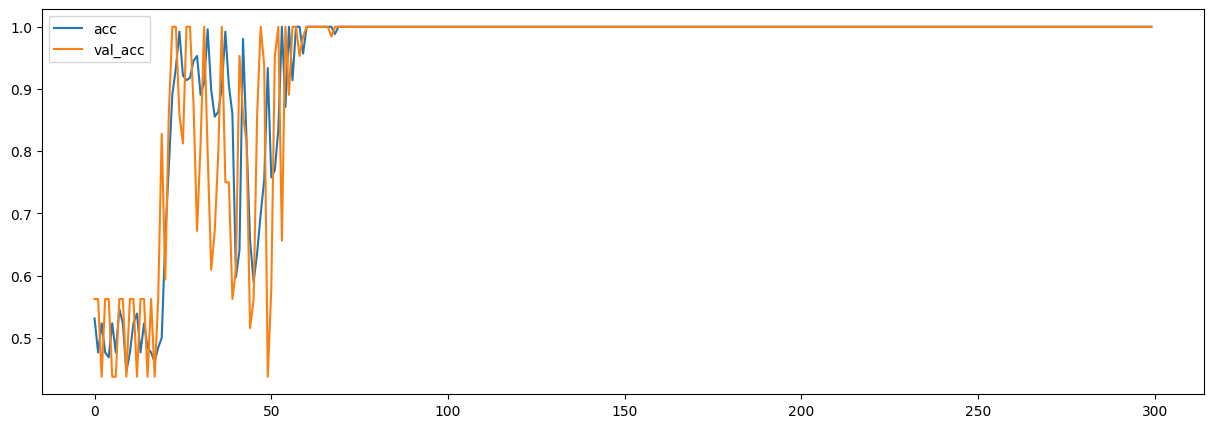

In [35]:
# 시각화
plt.figure(figsize = (15, 5))

plt.plot(h.history['acc'], label = 'acc')
plt.plot(h.history['val_acc'], label = 'val_acc')

plt.legend()
plt.show()

### 학습과 검증에 사용한 데이터 자체가 고정된 각도에서 큰 변동이 없는 상태로 찍혀진 사진이었기때문에 기계 입장에서는 쉽게 인식이되고 분류할 수 있었던 문제였다.

In [37]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]